<a href="https://colab.research.google.com/github/venkatasl/AIML_TRAINING_VENKAT/blob/venkat_creation/cognitive_cynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm, spearmanr
from tqdm import tqdm

In [2]:
df = pd.read_csv("Matrix.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Matrix.csv'

In [ ]:
df.shape

(221, 764)

In [ ]:
df

,Unnamed: 0,stim.string.left,1,2,3,4,5,6,7,8,...,453,454,455,456,457,458,459,460,461,462
0,0,ACCIDENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ACID,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2,ADDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ADEQUATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,4,AFFORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,354,WARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
355,355,WINDS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,356,WOODEN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,357,WORN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Extract matrix from words_df, ignoring the first column (words)
matrix = df.iloc[:, 2:].to_numpy()

In [ ]:
subid = np.arange(matrix.shape[1]) # Attach an identifier to each participant

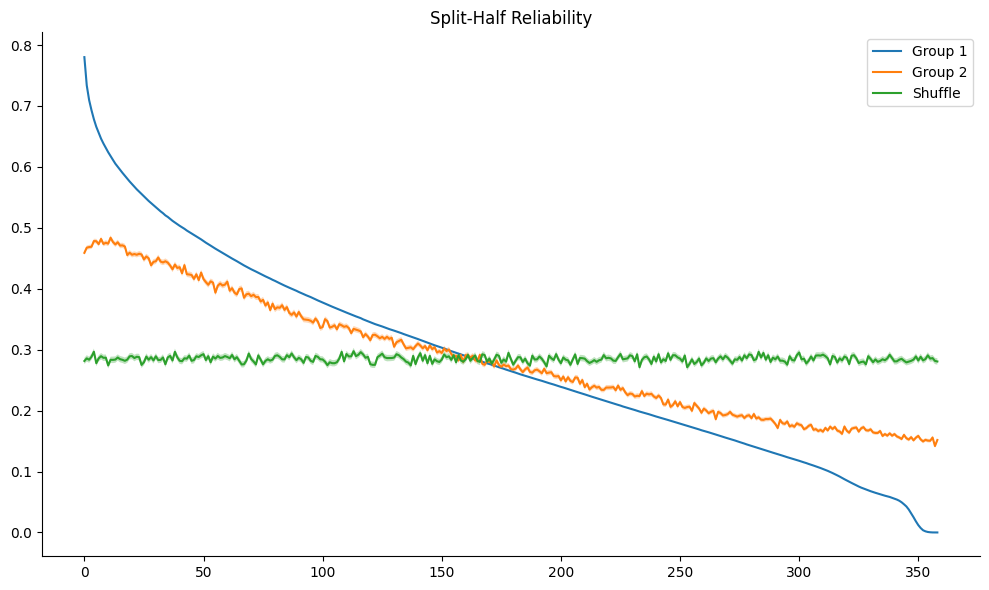

In [ ]:
# Initialize lists to store sorted memorability scores for each group and shuffled scores
group1memorability_sorted = []
group2memorability_sorted = []
shuffled_memorability = []

# Perform the split-half reliability calculation
for _ in range(1000): # Repeat the process 1000 times for robustness
    group1id = np.random.choice(subid, len(subid) // 2, replace=False) # Randomly split subid into two groups
    group2id = subid[~np.isin(subid, group1id)]   # Get the remaining subids not in group1

    # Calculate the mean memorability scores for each group
    group1memorability = np.nanmean(matrix[:, group1id], axis=1)
    group2memorability = np.nanmean(matrix[:, group2id], axis=1)

    # Sort memorability scores of group1 in descending order
    sort_order = (-group1memorability).argsort()
    group1memorability_sorted.append(group1memorability[sort_order])
    group2memorability_sorted.append(group2memorability[sort_order])
    shuffled_memorability.append(group2memorability[np.random.permutation(sort_order)])

# Convert lists to NumPy arrays for easier computation
group1memorability_sorted = np.array(group1memorability_sorted)
group2memorability_sorted = np.array(group2memorability_sorted)
shuffled_memorability = np.array(shuffled_memorability)

# Calculate mean and standard error of the mean for each group
group1_mean = np.nanmean(group1memorability_sorted, axis=0)
group2_mean = np.nanmean(group2memorability_sorted, axis=0)
shuffle_mean = np.nanmean(shuffled_memorability, axis=0)

group1_sem = np.std(group1memorability_sorted, axis=0) / np.sqrt(1000)
group2_sem = np.std(group2memorability_sorted, axis=0) / np.sqrt(1000)
shuffle_sem = np.std(shuffled_memorability, axis=0) / np.sqrt(1000)

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(group1_mean, label='Group 1')
axes.plot(group2_mean, label='Group 2')
axes.plot(shuffle_mean, label='Shuffle')

axes.fill_between(range(len(group1_mean)), group1_mean - group1_sem, group1_mean + group1_sem, alpha=0.3)
axes.fill_between(range(len(group2_mean)), group2_mean - group2_sem, group2_mean + group2_sem, alpha=0.3)
axes.fill_between(range(len(shuffle_mean)), shuffle_mean - shuffle_sem, shuffle_mean + shuffle_sem, alpha=0.3)

axes.legend()
axes.set_title('Split-Half Reliability')

# Remove top and right spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Convert the DataFrame to a NumPy array, excluding the first column (labels)
matrix = df.iloc[:, 2:].to_numpy()
num_subjects = matrix.shape[1] # Number of subjects (columns) in the data

# Initialize lists to store Spearman correlation coefficients for split-half and shuffled data
correlations = []
shuffled_correlations = []

# Perform 5000 iterations of the split-half correlation calculation
for iter in tqdm(range(5000)):
    half_1_means = []
    half_2_means = []

    for i in range(matrix.shape[0]): # Loop through each row (representing a word)
        # Get non-NaN indices for the current word
        valid_indices = np.where(~np.isnan(matrix[i, :]))[0]

        if len(valid_indices) >= 2:  # Only proceed if we have at least 2 valid subjects to split
            # Randomly split the valid subjects into two halves
            group1_id = np.random.choice(valid_indices, len(valid_indices) // 2, replace=False)
            group2_id = np.setdiff1d(valid_indices, group1_id)

            # Calculate means for each half, ignoring NaN values
            half_1_mean = np.mean(matrix[i, group1_id])
            half_2_mean = np.mean(matrix[i, group2_id])
        else:
            # If not enough valid data, skip this word
            half_1_mean = np.nan
            half_2_mean = np.nan

        half_1_means.append(half_1_mean)
        half_2_means.append(half_2_mean)

    half_1_means = np.array(half_1_means)
    half_2_means = np.array(half_2_means)

    # Identify indices where both halves have valid (non-NaN) data
    valid_correlation_indices = ~np.isnan(half_1_means) & ~np.isnan(half_2_means)
    if np.sum(valid_correlation_indices) > 0: # Proceed if there are valid indices
        sr, pv = spearmanr(half_1_means[valid_correlation_indices], half_2_means[valid_correlation_indices])
        correlations.append(sr)

        # Create a shuffled version of the second half and calculate Spearman correlation
        shuffled_half_2 = np.random.permutation(half_2_means[valid_correlation_indices])
        sr_shuffled, pv_shuffled = spearmanr(half_1_means[valid_correlation_indices], shuffled_half_2)
        shuffled_correlations.append(sr_shuffled)

# Convert lists to arrays for further calculations
correlations = np.array(correlations)
shuffled_correlations = np.array(shuffled_correlations)


Mean rho:  0.5936595910837587
Mean shuffled rho:  0.0009125380664906352


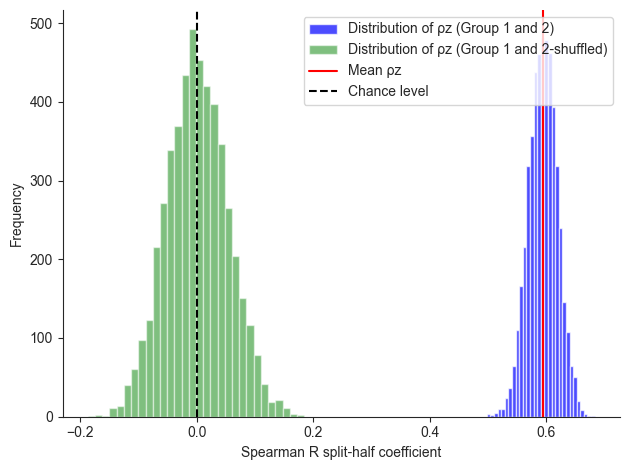

In [ ]:
# Mean of the correlations
mean_rhoz = np.nanmean(correlations) # Mean of original correlations
mean_shuffled_rhoz = np.nanmean(shuffled_correlations)  # Mean of shuffled correlations
print("Mean rho: ", mean_rhoz)
print("Mean shuffled rho: ", mean_shuffled_rhoz)

# Plotting
plt.hist(correlations, bins=30, density=False, alpha=0.7,  color='blue',label='Distribution of ρz (Group 1 and 2)')
plt.hist(shuffled_correlations, bins=30, density=False, alpha=0.5, color='green', label='Distribution of ρz (Group 1 and 2-shuffled)')
plt.axvline(mean_rhoz, color='red', label='Mean ρz')
plt.axvline(mean_shuffled_rhoz, color='black', linestyle='--', label='Chance level')
plt.xlabel("Spearman R split-half coefficient")
plt.ylabel("Frequency")
plt.legend()

# Get the current axes and adjust the spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.show()
